In [198]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [199]:
df=pd.read_csv("telecom_churn_10000.csv")
df

,Tenure,MonthlyCharges,TotalCharges,ContractType,InternetService,PaymentMethod,SupportCalls,LatePayments,DataUsageGB,Churn
0,16.0,690.0,11040.0,Month-to-month,DSL,Debit Card,2.0,0.0,28.79,0
1,52.0,515.0,26780.0,Month-to-month,Fiber,Net Banking,4.0,4.0,25.81,1
2,52.0,826.0,42952.0,Month-to-month,Fiber,Credit Card,6.0,1.0,3.35,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,51.0,900.0,45900.0,Month-to-month,Fiber,Debit Card,1.0,3.0,17.15,1
...,...,...,...,...,...,...,...,...,...,...
9995,6.0,956.0,5736.0,Two year,Fiber,UPI,3.0,1.0,21.39,0
9996,27.0,646.0,17442.0,One year,DSL,UPI,3.0,1.0,28.59,0
9997,19.0,469.0,8911.0,Two year,Fiber,UPI,5.0,1.0,14.35,0
9998,34.0,671.0,22814.0,Month-to-month,Fiber,UPI,1.0,4.0,13.01,1


In [200]:
df.shape


(10000, 10)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tenure           9500 non-null   float64
 1   MonthlyCharges   9500 non-null   float64
 2   TotalCharges     9500 non-null   float64
 3   ContractType     9500 non-null   object 
 4   InternetService  9500 non-null   object 
 5   PaymentMethod    9500 non-null   object 
 6   SupportCalls     9500 non-null   float64
 7   LatePayments     9500 non-null   float64
 8   DataUsageGB      9500 non-null   float64
 9   Churn            10000 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 781.4+ KB


In [202]:
df.dtypes

Tenure             float64
MonthlyCharges     float64
TotalCharges       float64
ContractType        object
InternetService     object
PaymentMethod       object
SupportCalls       float64
LatePayments       float64
DataUsageGB        float64
Churn                int64
dtype: object

In [203]:
df.isna().sum()

Tenure             500
MonthlyCharges     500
TotalCharges       500
ContractType       500
InternetService    500
PaymentMethod      500
SupportCalls       500
LatePayments       500
DataUsageGB        500
Churn                0
dtype: int64

In [204]:
df.duplicated().sum()

np.int64(498)

In [205]:
df.isna().sum()

Tenure             500
MonthlyCharges     500
TotalCharges       500
ContractType       500
InternetService    500
PaymentMethod      500
SupportCalls       500
LatePayments       500
DataUsageGB        500
Churn                0
dtype: int64

In [206]:
df.columns

Index(['Tenure', 'MonthlyCharges', 'TotalCharges', 'ContractType',
       'InternetService', 'PaymentMethod', 'SupportCalls', 'LatePayments',
       'DataUsageGB', 'Churn'],
      dtype='object')

In [207]:
df['Tenure']=df['Tenure'].fillna(df['Tenure'].mode()[0])

In [208]:
df['MonthlyCharges']=df['MonthlyCharges'].fillna(df['MonthlyCharges'].mode()[0])

In [209]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mode()[0])

In [210]:
df['ContractType']=df['ContractType'].fillna(df['ContractType'].mode()[0])

In [211]:
df['InternetService']=df['InternetService'].fillna(df['InternetService'].mode()[0])

In [212]:
df['PaymentMethod']=df['PaymentMethod'].fillna(df['PaymentMethod'].mode()[0])

In [213]:
df['SupportCalls']=df['SupportCalls'].fillna(df['SupportCalls'].mode()[0])

In [214]:
df['LatePayments']=df['LatePayments'].fillna(df['LatePayments'].mode()[0])

In [215]:
df["DataUsageGB"]=df["DataUsageGB"].fillna(df['DataUsageGB'].mode()[0])

In [216]:
df.isna().sum()

Tenure             0
MonthlyCharges     0
TotalCharges       0
ContractType       0
InternetService    0
PaymentMethod      0
SupportCalls       0
LatePayments       0
DataUsageGB        0
Churn              0
dtype: int64

In [217]:
df.dtypes

Tenure             float64
MonthlyCharges     float64
TotalCharges       float64
ContractType        object
InternetService     object
PaymentMethod       object
SupportCalls       float64
LatePayments       float64
DataUsageGB        float64
Churn                int64
dtype: object

In [218]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['ContractType']=lab.fit_transform(df['ContractType'])
df['InternetService']=lab.fit_transform(df['InternetService'])
df['PaymentMethod']=lab.fit_transform(df['PaymentMethod'])

In [219]:
df.dtypes

Tenure             float64
MonthlyCharges     float64
TotalCharges       float64
ContractType         int64
InternetService      int64
PaymentMethod        int64
SupportCalls       float64
LatePayments       float64
DataUsageGB        float64
Churn                int64
dtype: object

In [220]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
x

array([[1.6000e+01, 6.9000e+02, 1.1040e+04, ..., 2.0000e+00, 0.0000e+00,
        2.8790e+01],
       [5.2000e+01, 5.1500e+02, 2.6780e+04, ..., 4.0000e+00, 4.0000e+00,
        2.5810e+01],
       [5.2000e+01, 8.2600e+02, 4.2952e+04, ..., 6.0000e+00, 1.0000e+00,
        3.3500e+00],
       ...,
       [1.9000e+01, 4.6900e+02, 8.9110e+03, ..., 5.0000e+00, 1.0000e+00,
        1.4350e+01],
       [3.4000e+01, 6.7100e+02, 2.2814e+04, ..., 1.0000e+00, 4.0000e+00,
        1.3010e+01],
       [5.5000e+01, 6.3600e+02, 3.4980e+04, ..., 2.0000e+00, 0.0000e+00,
        8.2700e+00]])

In [221]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train

array([[5.0000e+00, 6.0000e+02, 3.0000e+03, ..., 0.0000e+00, 0.0000e+00,
        1.5700e+00],
       [8.0000e+00, 5.3000e+02, 4.2400e+03, ..., 4.0000e+00, 2.0000e+00,
        1.0160e+01],
       [2.3000e+01, 8.6700e+02, 1.9941e+04, ..., 2.0000e+00, 1.0000e+00,
        1.5360e+01],
       ...,
       [4.5000e+01, 4.3900e+02, 1.9755e+04, ..., 1.0000e+00, 0.0000e+00,
        2.7680e+01],
       [5.6000e+01, 9.8800e+02, 5.5328e+04, ..., 1.0000e+00, 0.0000e+00,
        1.2650e+01],
       [1.0000e+00, 9.8400e+02, 9.8400e+02, ..., 3.0000e+00, 2.0000e+00,
        1.7740e+01]])

In [222]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)


In [223]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
random = RandomForestClassifier(
    n_estimators=50,
    max_depth=3,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features="sqrt",
    random_state=42
)
random.fit(x_train,y_train)
y_pred=random.predict(x_test)


In [224]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
cm

array([[1184,  277],
       [  11, 1528]])

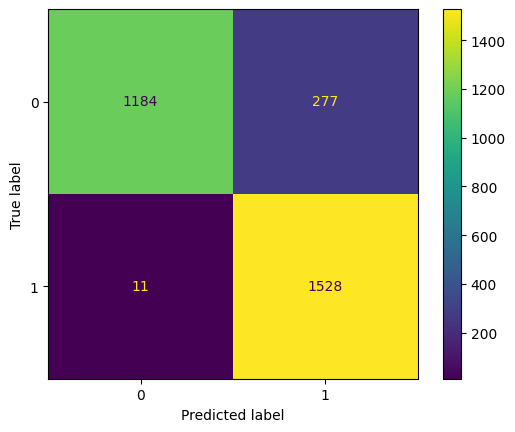

In [225]:
cmd=ConfusionMatrixDisplay(cm)
cmd.plot()

In [226]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.904

In [227]:
train_pred = random.predict(x_train)
train_accuracy = accuracy_score(y_train, train_pred)
train_accuracy

0.9885714285714285

In [228]:
test_pred = random.predict(x_test)
test_accuracy = accuracy_score(y_test, test_pred)
test_accuracy

0.904